In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import snscrape.modules.twitter as sntwitter
import re
import flair

C:\Users\007ra\.conda\envs\dataScience\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2022-05-03 00:03:45,350 loading file C:\Users\007ra\.flair\models\sentiment-en-mix-distillbert_4.pt


In [3]:
def cleanText(text):
    whitespace = re.compile(r"\s+")
    web_address = re.compile(r"(?i)http(s):\/\/[a-z0-9.~_\-\/]+")
    user = re.compile(r"(?i)@[a-z0-9_]+")
    text = whitespace.sub(' ', text)
    text = web_address.sub('', text)
    text = user.sub('', text)
    text = re.sub(r"(?:@\S*|#\S*|http(?=.*://)\S*)", "", text)
    return text

In [4]:
dataFrame = pd.read_csv('./data/daily.csv')
dataFrame = dataFrame[6200:6250]
print(dataFrame)

           Day  Price
6200  20210813   3.95
6201  20210816   3.93
6202  20210817   3.92
6203  20210818   3.86
6204  20210819   3.83
6205  20210820   3.94
6206  20210823   3.93
6207  20210824   3.95
6208  20210825   4.03
6209  20210826   4.07
6210  20210827   4.35
6211  20210830   4.25
6212  20210831   4.33
6213  20210901   4.45
6214  20210902   4.65
6215  20210903   4.77
6216  20210907   4.71
6217  20210908   4.66
6218  20210909   4.97
6219  20210910   5.13
6220  20210913   5.21
6221  20210914   5.39
6222  20210915   5.66
6223  20210916   5.52
6224  20210917   5.32
6225  20210920   5.25
6226  20210921   4.96
6227  20210922   4.92
6228  20210923   4.94
6229  20210924   5.10
6230  20210927   5.53
6231  20210928   5.94
6232  20210929   5.73
6233  20210930   5.58
6234  20211001   5.61
6235  20211004   5.80
6236  20211005   6.37
6237  20211006   6.00
6238  20211007   5.71
6239  20211008   5.46
6240  20211011   5.46
6241  20211012   5.34
6242  20211013   5.56
6243  20211014   5.92
6244  2021

In [30]:
sentence = flair.data.Sentence('gas prices are going to decrease')
sentiment_model.predict(sentence)
sentence

Sentence: "gas prices are going to decrease" → NEGATIVE (0.933)

In [31]:
sentence = flair.data.Sentence('gas prices are going to increase')
sentiment_model.predict(sentence)
sentence

Sentence: "gas prices are going to increase" → POSITIVE (0.9485)

In [20]:
data = {}
MAX_TWEETS = 25


for n in range (1, len(dataFrame['Day'])):
    PREV = str(list(dataFrame.Day)[n-1])[:4]+'-'+str(list(dataFrame.Day)[n-1])[4:6]+'-'+str(list(dataFrame.Day)[n-1])[6:]
    PRES = str(list(dataFrame.Day)[n])[:4]+'-'+str(list(dataFrame.Day)[n])[4:6]+'-'+str(list(dataFrame.Day)[n])[6:]
    QUERY = f"natural gas (natural OR gas OR import OR export OR price) until:{PRES} since:{PREV} -filter:links -filter:replies"
    print(f'checking for {PREV} - {PRES}', end = ' ')
    curr = 0.0
    nums = 0
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(QUERY).get_items()):
        nums += 1
        if i>MAX_TWEETS:
            break
        sentence = flair.data.Sentence(cleanText(tweet.content))
        sentiment_model.predict(sentence)
        try:
            if(sentence.labels[0].value == 'POSITIVE'):
                curr += sentence.labels[0].score
            elif(sentence.labels[0].value == 'NEGATIVE'):
                curr -= sentence.labels[0].score
            else:
                print(f'The sentiment is {sentence.labels[0].value}')
        except:
            pass
    print(f"The sentiment is {curr/nums}")
    dataFrame.loc[dataFrame.Price == list(dataFrame['Price'])[n], 'Sentiment'] = curr/nums
    data[PRES] = curr/nums

checking for 2021-08-16 The sentiment is -0.1250334823573077
checking for 2021-08-17 The sentiment is -0.19093084776843036
checking for 2021-08-18 The sentiment is -0.18198450406392416
checking for 2021-08-19 The sentiment is -0.38432481112303557
checking for 2021-08-20 The sentiment is -0.055625820601428
checking for 2021-08-23 The sentiment is -0.12582746037730463
checking for 2021-08-24 The sentiment is -0.31518918055075185
checking for 2021-08-25 The sentiment is -0.3012642948715775
checking for 2021-08-26 The sentiment is -0.20499659688384445
checking for 2021-08-27 The sentiment is -0.3646187804363392
checking for 2021-08-30 The sentiment is -0.3425274336779559
checking for 2021-08-31 The sentiment is -0.12381823195351495
checking for 2021-09-01 The sentiment is 0.07221037370187265
checking for 2021-09-02 The sentiment is -0.35201051941624395
checking for 2021-09-03 The sentiment is -0.08839624457889134
checking for 2021-09-07 The sentiment is 0.015414608849419488
checking for 20

In [21]:
print(dataFrame)

           Day  Price  Sentiment
6200  20210813   3.95  -0.315189
6201  20210816   3.93  -0.125827
6202  20210817   3.92  -0.190931
6203  20210818   3.86  -0.181985
6204  20210819   3.83  -0.384325
6205  20210820   3.94  -0.055626
6206  20210823   3.93  -0.125827
6207  20210824   3.95  -0.315189
6208  20210825   4.03  -0.301264
6209  20210826   4.07  -0.204997
6210  20210827   4.35  -0.364619
6211  20210830   4.25  -0.342527
6212  20210831   4.33  -0.123818
6213  20210901   4.45   0.072210
6214  20210902   4.65  -0.352011
6215  20210903   4.77  -0.088396
6216  20210907   4.71   0.015415
6217  20210908   4.66  -0.498240
6218  20210909   4.97  -0.637899
6219  20210910   5.13  -0.356476
6220  20210913   5.21  -0.156186
6221  20210914   5.39  -0.372254
6222  20210915   5.66  -0.326643
6223  20210916   5.52  -0.392400
6224  20210917   5.32  -0.214805
6225  20210920   5.25  -0.455385
6226  20210921   4.96  -0.291483
6227  20210922   4.92  -0.146975
6228  20210923   4.94  -0.505512
6229  2021

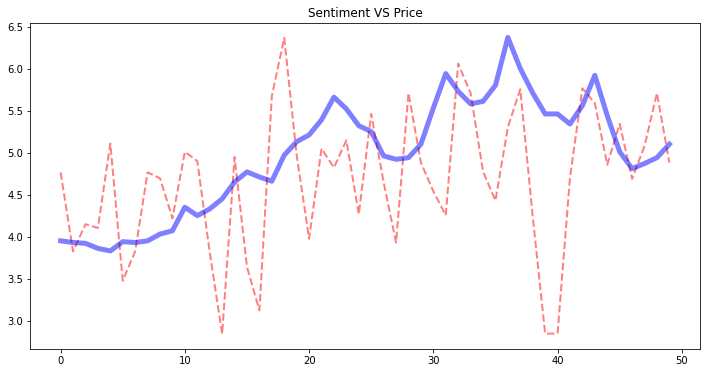

In [23]:
avg = sum(list(dataFrame.Price))/len(list(dataFrame.Price))
sen = list(dataFrame.Sentiment)
price = list(dataFrame.Price)
for i in range (len(sen)):
    sen[i] = -(sen[i]*avg)+3.2
plt.figure(figsize=(12, 6))
l1 = plt.plot(sen, lw = 2, color='red', alpha=0.5, linestyle='dashed')
l2 = plt.plot(price, lw = 5, color='blue', alpha=0.5)
plt.title('Sentiment VS Price')
plt.show()